## Generate handwritten digits with trained CVAE net

In [1]:
# Copyright (C) 2018 Zhixian MA <zx@mazhixian.me>

In [2]:
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

In [3]:
import tensorflow as tf

/usr/lib/python3/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
from cvae.cvae import cvae
from cvae.utils import utils

In [5]:
from cvae.configs import config_mnist
from cvae.configs import config_train

### Load mnist data

In [6]:
# Step1 load MNITST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=False, validation_size=5000)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [7]:
cf = config_mnist
tr_cf = config_train

### Build the net

In [8]:
net = cvae(cf)
net.cvae_build()
# print the net structure
net.cvae_print()

Layer ID    Layer type    Layer shape
0 Input layer [None, 794]
1 FC layer 0 [None, 512]
2 BN layer 0 [None, 512]
3 FC layer 1 [None, 256]
4 BN layer 1 [None, 256]
5 En_mu [None, 16]
6 En_sigma [None, 16]
7 z [None, 16]
8 FC layer 1 [None, 256]
9 BN layer 1 [None, 256]
10 FC layer 0 [None, 512]
11 BN layer 0 [None, 512]
12 Output layer [None, 784]


### Restore the net

In [9]:
net.get_learning_rate()
net.get_loss()
net.get_opt()

# load the net
import os
foldname = "./cvae_mnist"
name = 'cvae.pkl'
net.sess, name = utils.load_net(os.path.join(foldname, name))

INFO:tensorflow:Restoring parameters from ./cvae_mnist/model_cvae.ckpt


### Generate new samples

/home/mzx/.local/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


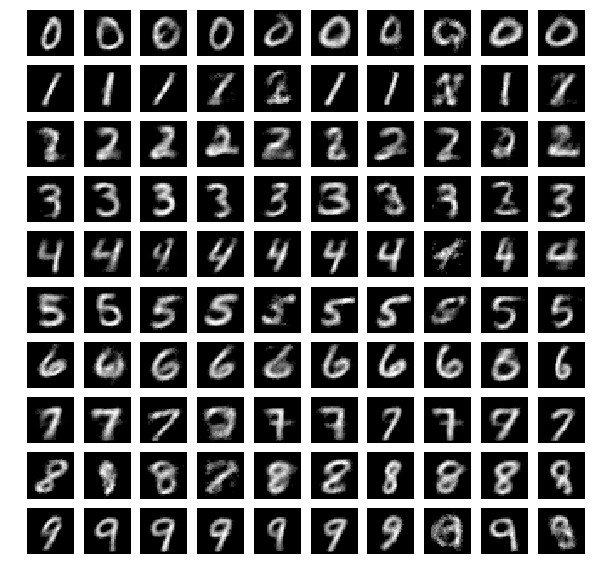

In [10]:
n_examples = 10

fig, axs = plt.subplots(cf.numclass, n_examples, figsize=(n_examples, cf.numclass))
for i in range(cf.numclass):
    z_gen = np.random.normal(0, 1, [n_examples, cf.z_length])
    # label
    labels = np.zeros([n_examples, cf.numclass])
    labels[:,i] = 1
    imgs = net.sess.run(
        net.outputs_de, 
        feed_dict = {net.z: z_gen, net.conditions: labels, 
                     net.is_training: False, 
                     net.keep_prob: 1.0})
    img_test = [np.reshape(imgs[i], [cf.rs, cf.rs]) for i in range(len(imgs))]
    for example_i in range(n_examples):
        # original
        axs[i][example_i].imshow(img_test[example_i], cmap='gray')
        axs[i][example_i].axis('off')

fig.show()
plt.draw()
# plt.savefig("fig_ce.png", bbox_inches='tight', dpi=200)